# Imports 

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

# Load MNIST dataset

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and Normalize the data

In [8]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define the model layers

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.1)

Epoch 1/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9883 - val_loss: 0.0442
Epoch 2/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 3/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9882 - val_loss: 0.0475
Epoch 4/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9915 - val_loss: 0.0350
Epoch 5/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9920 - val_loss: 0.0412


# Evaluate on test set

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0375
Test Accuracy: 0.99


# Plot training and validation accuracy and losses

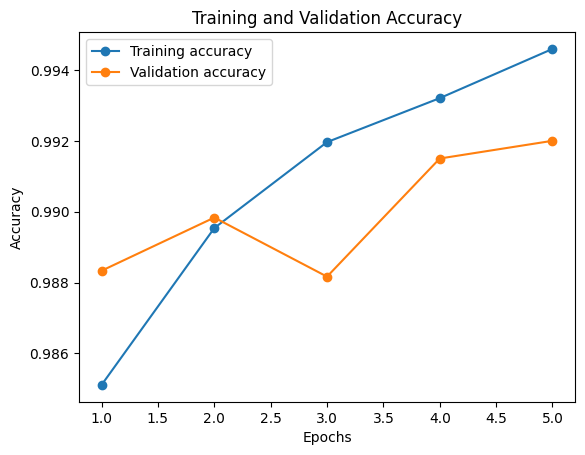

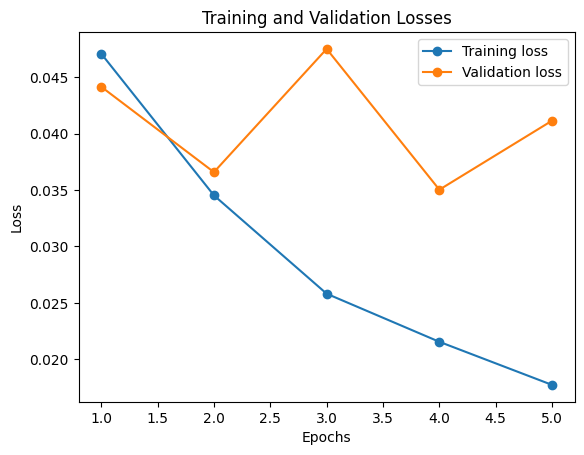

In [14]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label='Training accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training loss', marker='o')
plt.plot(epochs, val_loss, label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()